In [213]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
data = pd.read_csv("datasets_20710_26737_Bengaluru_House_Data.csv")

In [5]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
data.shape

(13320, 9)

In [11]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [39]:
df1=data.groupby("area_type")['area_type'].agg('count')

In [40]:
df1

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [51]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [54]:
data= data.dropna(axis = 0, how ='any')

In [55]:
data.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [59]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [186]:
data[data.bhk>5]

(7496, 11)

In [105]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [106]:
is_float(6-9)

True

In [108]:
data[~data['total_sqft'].apply(is_float)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,Bhath N,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135,2


In [139]:
def sqftrange_float(x):
    values = x.split('-')
    if len(values) == 2:
        return  (float(values[0]) + float(values[1]))/2
    try:
        return float(x)
    except:
        None

In [168]:
data1['total_sqft'] =data1['total_sqft'].apply(sqftrange_float)

In [185]:
data.shape

(7496, 11)

In [167]:
data['total_sqft'].head(100)

0      1056.0
1      2600.0
3      1521.0
5      1170.0
11     2785.0
        ...  
168    1060.0
169    1470.0
171     450.0
172    1152.0
173    1350.0
Name: total_sqft, Length: 100, dtype: float64

In [146]:
data1=data.copy()

In [157]:
data1.drop(['availability','area_type','size','society','total_sqft1'] ,axis=1, inplace = True)

In [158]:
data1

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
5,Whitefield,1170,2.0,1.0,38.00,2
11,Whitefield,2785,5.0,3.0,295.00,4
...,...,...,...,...,...,...
13313,Uttarahalli,1345,2.0,1.0,57.00,3
13314,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Whitefield,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2


In [162]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7496 non-null   object 
 1   total_sqft  7496 non-null   object 
 2   bath        7496 non-null   float64
 3   balcony     7496 non-null   float64
 4   price       7496 non-null   float64
 5   bhk         7496 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 409.9+ KB


In [169]:
data1["total_sqft"]= data1["total_sqft"].astype(float) 

In [171]:
data1['price_per_sqft']= data1['price']*100000/(data1['total_sqft'])

In [172]:
data1.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605


In [173]:
data1.location = data1.location.apply(lambda x: x.strip())
location_stats = data1['location'].value_counts(ascending=False)
location_stats

Whitefield             398
Sarjapur  Road         310
Electronic City        238
Kanakpura Road         216
Thanisandra            215
                      ... 
RBI Layout               1
Udayagiri                1
New Gurappana Palya      1
Vikram Nagar             1
Hennur Bande             1
Name: location, Length: 626, dtype: int64

In [175]:
len(location_stats[location_stats>10])

143

In [176]:

len(location_stats[location_stats<10])

472

In [177]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Prithvi Layout         10
Sector 2 HSR Layout    10
BTM Layout             10
Rayasandra             10
Mallasandra            10
                       ..
RBI Layout              1
Udayagiri               1
New Gurappana Palya     1
Vikram Nagar            1
Hennur Bande            1
Name: location, Length: 483, dtype: int64

In [178]:
data1.location = data1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data1.location.unique())


144

In [183]:
data1.shape

(7496, 7)

In [201]:
data2=data1[~(data1['total_sqft']/data1['bhk']<300)]


In [202]:
data2

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605
...,...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,1.0,57.00,3,4237.918216
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136


In [208]:
data2= data2[~(data2['price_per_sqft']<1000)]

In [209]:
data2.shape

(7452, 7)

In [211]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data3 = remove_pps_outliers(data2)
data3.shape


(5859, 7)

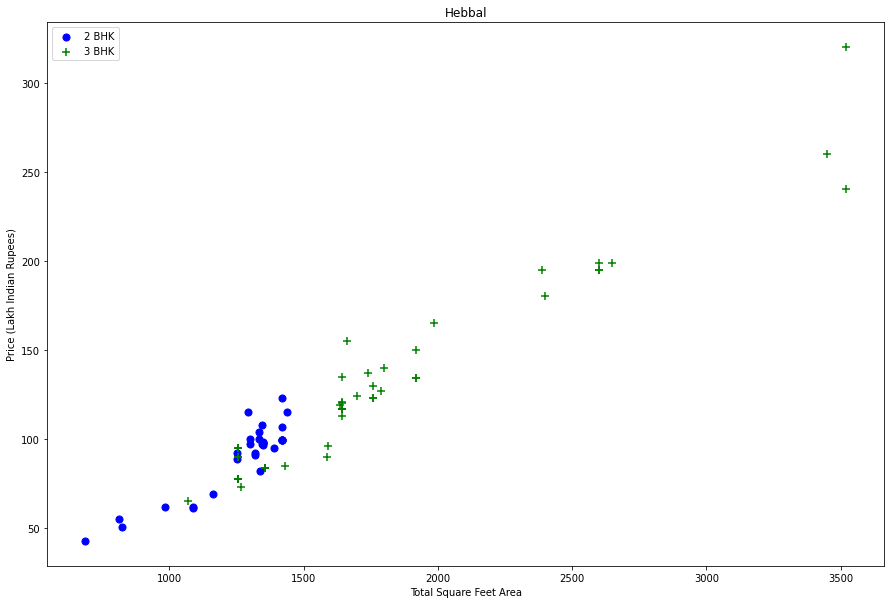

In [215]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data3,"Hebbal")

In [216]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data4 = remove_bhk_outliers(data3)
# df8 = df7.copy()
data4.shape

(4057, 7)

In [217]:
data5 = data4[data4.bath<data4.bhk+2]
data5.shape

(4015, 7)

In [220]:
data5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Phase JP Nagar,2825.0,4.0,3.0,250.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,8906.666667
2,1st Phase JP Nagar,1394.0,2.0,1.0,100.0,2,7173.601148
3,1st Phase JP Nagar,1077.0,2.0,2.0,93.0,2,8635.097493
4,1st Phase JP Nagar,1590.0,3.0,3.0,131.0,3,8238.993711


In [221]:
data5= data5.drop(['price_per_sqft'], axis=1)

In [222]:
data5

,location,total_sqft,bath,balcony,price,bhk
0,1st Phase JP Nagar,2825.0,4.0,3.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3
2,1st Phase JP Nagar,1394.0,2.0,1.0,100.0,2
3,1st Phase JP Nagar,1077.0,2.0,2.0,93.0,2
4,1st Phase JP Nagar,1590.0,3.0,3.0,131.0,3
...,...,...,...,...,...,...
5850,other,1155.0,2.0,1.0,64.0,2
5851,other,1508.0,3.0,1.0,77.0,3
5853,other,1095.0,2.0,1.0,57.0,2
5855,other,1256.0,2.0,1.0,65.0,2


In [223]:
dummies = pd.get_dummies(data5.location)
dummies.head(3)


,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
data5 = pd.concat([data5,dummies.drop('other',axis='columns')],axis='columns')
data5.head()

,location,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,2825.0,4.0,3.0,250.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1394.0,2.0,1.0,100.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,1077.0,2.0,2.0,93.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,1590.0,3.0,3.0,131.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
data5 = data5.drop('location',axis='columns')
data5.head(2)

,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,3.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,1.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
data5.shape

(4015, 148)

In [234]:
X= data5.drop(['price'], axis =1)

In [235]:
X.shape

(4015, 147)

In [236]:
y= data5.price

In [237]:
y.shape

(4015,)

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [241]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9300747897112215

In [242]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.9251339 , 0.9143025 , 0.93534922, 0.92063784, 0.90611378])

In [243]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.920307,{'normalize': True}
1,lasso,0.788348,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.856260,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [244]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [251]:
predict_price('Indira Nagar',1000, 2, 2)

125.76627188308049

In [260]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

105.39801230693047

In [252]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [254]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))